<a href="https://colab.research.google.com/github/farshadabdulazeez/Cali-Kode-Sneakers/blob/main/dropout_regularization_regression_and_classification_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dropout in Regression Scenario**

**Importing required libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Generating and Visualizing Data**

In [2]:
# Training data (features and target)
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                     0.5524 ,  0.23115,  0.20835,  0.4211 ,  0.60485])

In [3]:
# Test data (features and target)
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                    0.23415,  0.46575,  0.07955,  0.1973 ,  0.0719,
                    0.3639 ,  0.5536 ,  0.3365 ,  0.50705,  0.33435])

**Visualize training and testing data**

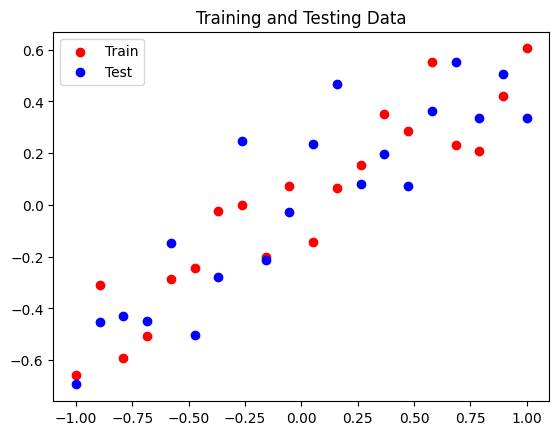

In [4]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.title("Training and Testing Data")
plt.show()

# **Model 1: Regression Without Dropout**

**Define a Sequential model**

In [5]:
model_1 = Sequential([
    Dense(128, input_dim=1, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="linear")  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [6]:
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

**Train the model**

In [7]:
history = model_1.fit(X_train, y_train, epochs=500,
                      validation_data=(X_test, y_test), verbose=False)

**Evaluate the model**

In [9]:
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 (No Dropout) - Train MSE: {train_mse}, Test MSE: {test_mse}')

Model 1 (No Dropout) - Train MSE: 0.00370481563732028, Test MSE: 0.04542381316423416


**Predict on test data**

In [10]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


**Visualize predictions**

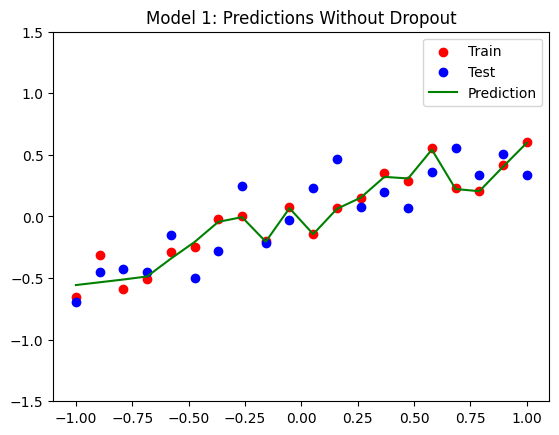

In [11]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1, label='Prediction', color='green')
plt.legend()
plt.title("Model 1: Predictions Without Dropout")
plt.ylim((-1.5, 1.5))
plt.show()

# **Model 2: Regression With Dropout**

**Define a Sequential model with dropout layers**

In [17]:
model_2 = Sequential([
    Dense(128, input_dim=1, activation="relu"),
    Dropout(0.2),  # Dropout layer with 20% drop rate
    Dense(128, activation="relu"),
    Dropout(0.2),  # Dropout layer with 20% drop rate
    Dense(1, activation="linear")  # Output layer
])

In [18]:
# Create a new optimizer instance for this model
adam_2 = Adam(learning_rate=0.01)

**Compile the model**

In [19]:
model_2.compile(loss='mse', optimizer=adam_2, metrics=['mse'])

**Train the model**

In [20]:
drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data=(X_test, y_test), verbose=False)


**Evaluate the dropout model**

In [21]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010959464125335217, Test: 0.035368435084819794


**Predict and plot results for the dropout model**

In [22]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


**Visualize predictions**

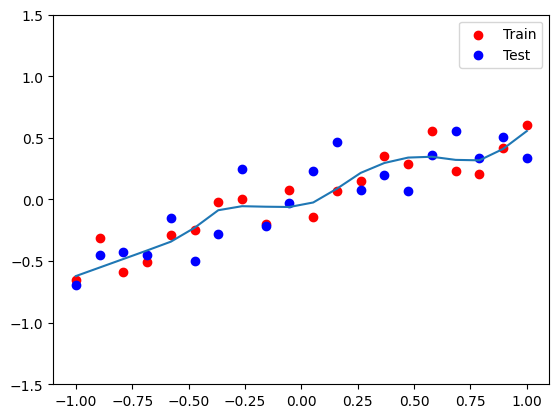

In [23]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# **Conclusion**
--------------------------

1. Model 1 (Without Dropout):
   - Train MSE is likely lower compared to the test MSE, indicating possible overfitting.
   - The model captures training data well but may not generalize as effectively to test data.

2. Model 2 (With Dropout):
   - Train MSE is higher due to regularization, as dropout introduces noise during training.
   - Test MSE may be lower compared to Model 1, demonstrating better generalization.

Overall, dropout improves the model's ability to generalize by reducing overfitting, especially in scenarios with limited data like this regression task.

# **Dataset for Classification Scenario**

**Dataset Initialization**

In [26]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

**Plotting the Data**

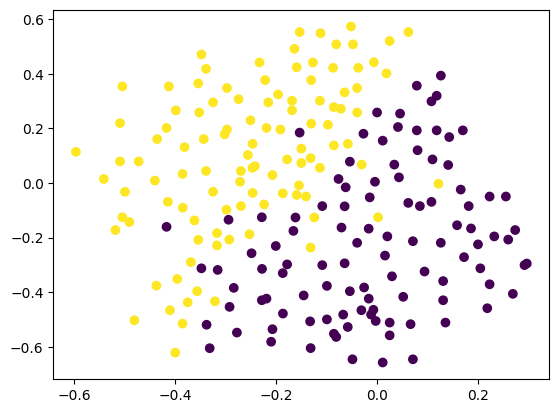

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# **Model 1: Classification Without Dropout**

**Defining the Neural Network Model (Without Dropout)**

In [29]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5873 - loss: 0.5961 - val_accuracy: 0.6279 - val_loss: 0.6588
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9005 - loss: 0.2502 - val_accuracy: 0.8140 - val_loss: 0.4650
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8847 - loss: 0.2735 - val_accuracy: 0.8372 - val_loss: 0.4330
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8948 - loss: 0.3144 - val_accuracy: 0.8140 - val_loss: 0.3876
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9158 - loss: 0.1970 - val_accuracy: 0.8605 - val_loss: 0.3907
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9239 - loss: 0.2101 - val_accuracy: 0.9070 - val_loss: 0.3189
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9103 - loss: 0.2488 - val_accuracy: 0.8605 - val_loss: 0.3902
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9296 - loss: 0.2231 - val_accuracy: 0.8605 - val_loss: 

In [30]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


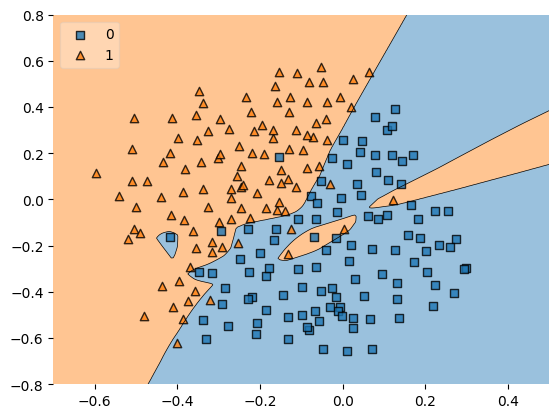

In [31]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

**Visualizing Training Performance**

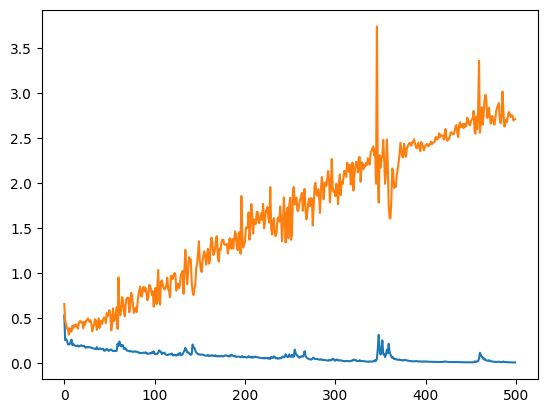

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

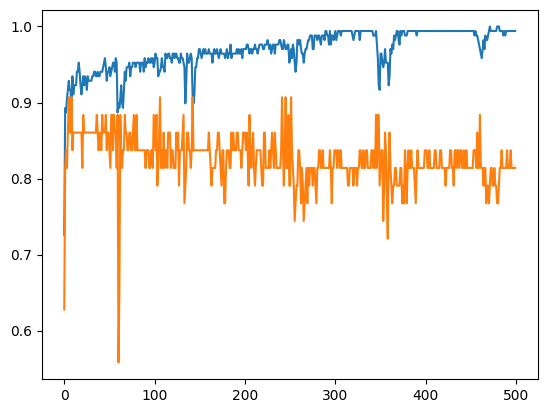

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# **Model 2: Regression With Dropout**

**Defining the Neural Network Model (With Dropout)**

In [34]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7251 - loss: 0.6313 - val_accuracy: 0.5581 - val_loss: 0.6404
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8534 - loss: 0.3506 - val_accuracy: 0.6047 - val_loss: 0.8843
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8765 - loss: 0.2717 - val_accuracy: 0.6744 - val_loss: 0.6966
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8503 - loss: 0.3233 - val_accuracy: 0.8372 - val_loss: 0.5981
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8430 - loss: 0.3590 - val_accuracy: 0.7442 - val_loss: 0.4774
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8734 - loss: 0.2955 - val_accuracy: 0.7442 - val_loss: 0.4654
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8956 - loss: 0.2190 - val_accuracy: 0.8372 - val_loss: 0.4282
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9141 - loss: 0.2551 - val_accuracy: 0.8605 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


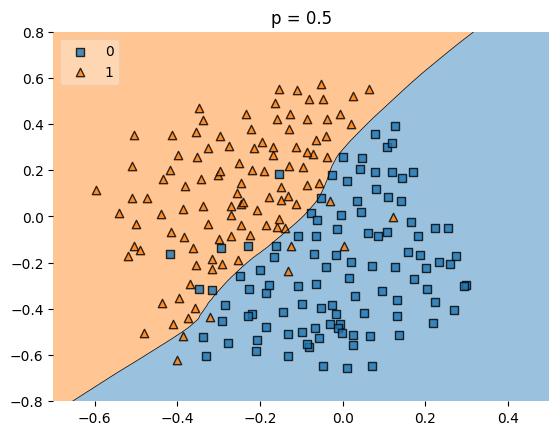

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

**Visualizing Training Performance**

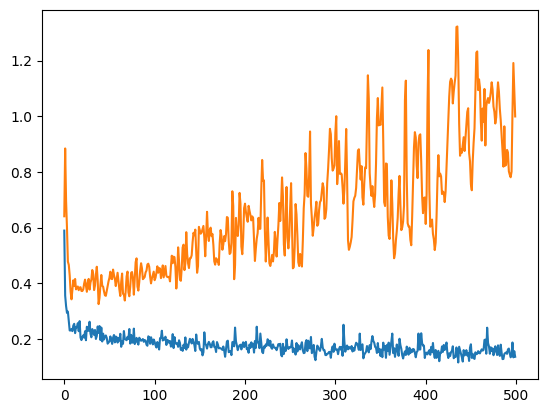

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

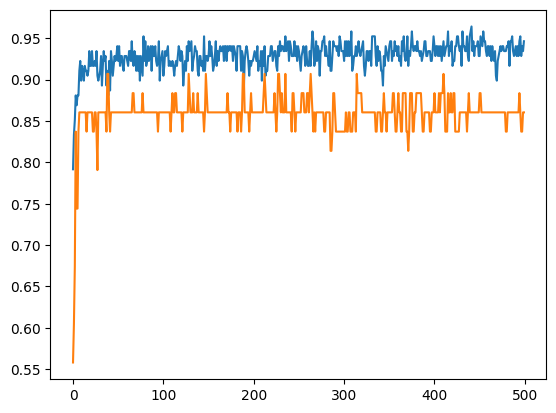

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# **Conclusion**:
-----------

In this classification task, we compared the performance of a neural network with and without dropout.

1. **Without Dropout**:
   - The network relies fully on all the units, which can lead to overfitting, especially if the model is complex relative to the dataset.
   - The model tends to memorize the training data, achieving high accuracy on the training set but often resulting in poor generalization to new, unseen data.

2. **With Dropout**:
   - Dropout helps to regularize the model by randomly deactivating a fraction of neurons during each training step. This prevents the model from overfitting by ensuring that the network does not rely too heavily on specific neurons.
   - This leads to better generalization and often results in a more robust model that performs well on unseen data.
